In [1]:
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from PIL import Image
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import classification_report


In [2]:
N = 150
w,h = 200, 200
size = (w, h, 3)
female = glob('females/*')
male = glob('males/*')


female_list = np.random.choice(female, N, replace=False)
male_list = np.random.choice(male, N, replace=False)

In [3]:
def pic_preprocess (image_file, width, height):
    
    img = Image.open(image_file)
    post = img.resize((width, height), Image.NEAREST)
    
    pix = np.array(post)
    return pix.flatten()
#     return post.getcolors(height*width)




In [4]:
raw_data = [(pic_preprocess(f, w, h), 0) for f in female_list] + [(pic_preprocess(m, w, h),1) for m in male_list]


labels = np.array([datapoint[1] for datapoint in raw_data])
data = np.array([datapoint[0] for datapoint in raw_data])
norm_data = np.array([datapoint[0] - np.mean(datapoint[0]) for datapoint in raw_data])

In [6]:
print (np.shape(data))



(300, 120000)


In [7]:
com = .70
pca = decomposition.PCA(n_components=com, whiten=True, copy=True)

proj = pca.fit_transform(norm_data)


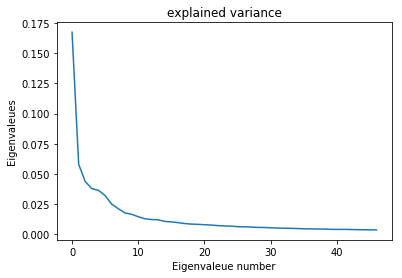

In [8]:
plt.figure()
plt.title('explained variance')
plt.xlabel('Eigenvaleue number')
plt.ylabel('Eigenvaleues')
plt.plot(np.arange(0, len(pca.explained_variance_), 1), pca.explained_variance_ratio_)
plt.show()

In [9]:
approximation = pca.inverse_transform(proj)


In [34]:
np.shape(approximation)

(300, 120000)

In [35]:
shape_proj = np.shape(proj)
shape_proj

(300, 43)

In [36]:
def image_from_component_values(component):
    """takes one of the principal components and turns it into an image"""
    hi = max(component)
    lo = min(component)
    n = int(len(component) / 3)
    divisor = hi - lo
    if divisor == 0:
        divisor = 1
    
    def rescale(x):
        return int(255 * (x - lo) / divisor)
    
    d = [(rescale(component[3 * i]),
          rescale(component[3 * i + 1]),
          rescale(component[3 * i + 2])) for i in range(n)]
    
    im = Image.new('RGB',(w, h))
    im.putdata(d)
    return im



In [1]:
plt.figure(figsize=(8,4))
p_index = 3

data[3]
# Original Image
plt.subplot(1, 3, 1)
plt.imshow(data[p_index].reshape(size),
           cmap=plt.cm.gray,interpolation='nearest',
              clim=(0, 255))

plt.xlabel('{} components'.format(np.shape(data)[1]))
plt.title('Original Image')

#norm
plt.subplot(1, 3, 2)
plt.imshow(norm_data[p_index].reshape(size),
           cmap=plt.cm.gray,interpolation='nearest',
              clim=(0, 255))

plt.xlabel('{} components'.format(np.shape(norm_data)[1]))
plt.title('normalized Image')

# pca
plt.subplot(1, 3, 3)
r = image_from_component_values(approximation[p_index,:])
plt.imshow(r)

plt.xlabel('{} components'.format(shape_proj[1]))
plt.title('{}% of Explained Variance'.format(com*100))

plt.show()

NameError: name 'plt' is not defined

In [40]:
(x_train, x_test, y_train, y_test) = train_test_split(norm_data, labels, test_size=0.1, random_state=5 )


In [62]:
lda = LDA(n_components = 1)
proj = lda.fit(x_train, y_train)


In [63]:
y_pred = lda.predict(x_test)

In [64]:
print classification_report(y_test, y_pred)


             precision    recall  f1-score   support

          0       0.57      0.57      0.57        14
          1       0.62      0.62      0.62        16

avg / total       0.60      0.60      0.60        30

